### In one experiment, the percentage of shrinkage was measured by drying 50 plastic clay test specimens. The following results were produced:

In [1]:
tests = (19.3, 20.5, 17.9, 17.3, 17.1, 15.8, 16.9, 17.1, 19.5, 22.5,
       20.7, 18.5, 22.5, 10.1, 17.9, 18.4, 18.7, 18.8, 17.5, 17.5,
       14.9, 12.3, 19.4, 16.8, 19.3, 17.3, 19.5, 17.4, 16.3, 18.8,
       21.3, 23.4, 18.5, 19, 19, 16.1, 18.8, 17.5, 18.2, 17.4,
       18.6, 18.3, 16.5, 17.4, 17.4, 20.5, 16.9, 17.5, 18.2, 22.5)

n = len(tests)
print(n)

50


In [4]:
# Sturges-Regel k=1+log2(N)

import math
k = 1 + math.log2(n) # number of intervals
print(k)

#oder
#k = math.sqrt(n)
#print(k)

min_test = min(tests)
max_test = max(tests)
rh = ( max_test - min_test ) / k
h = round(rh) # interval size

print(f'maximum test: {max_test} , minimum test: {min_test} , range of the interval: {rh:.4f} --> (rounded): {h}')

min_test = round(min_test)
max_test = round(max_test)
print(f'first interval: [{min_test+(h*0)}-{min_test + h*1})')
print(f'second interval: [{min_test+(h*1)}-{min_test + h*2})')
print('.')
print('.')
k = math.ceil(k)
print(f'last interval: [{min_test+(h*(k-1))}-{min_test + h*k})')

print()

6.643856189774724
maximum test: 23.4 , minimum test: 10.1 , range of the interval: 2.0018 --> (rounded): 2
first interval: [10-12)
second interval: [12-14)
.
.
last interval: [22-24)



In [6]:
from tabulate import tabulate

i = []
show_i = []

for t in range(k):
    i.append( min_test + (h*t) ) #, min_test + h*(t+1)])
    show_i.append([t , str(min_test + (h*t))+'-'+str(min_test + h*(t+1))])

print('i:', i)
print('to print:', show_i)

print(tabulate(show_i, headers=['', 'interval'], tablefmt='fancy_grid')) # headers='firstrow'


i: [10, 12, 14, 16, 18, 20, 22]
to print: [[0, '10-12'], [1, '12-14'], [2, '14-16'], [3, '16-18'], [4, '18-20'], [5, '20-22'], [6, '22-24']]
╒════╤════════════╕
│    │ interval   │
╞════╪════════════╡
│  0 │ 10-12      │
├────┼────────────┤
│  1 │ 12-14      │
├────┼────────────┤
│  2 │ 14-16      │
├────┼────────────┤
│  3 │ 16-18      │
├────┼────────────┤
│  4 │ 18-20      │
├────┼────────────┤
│  5 │ 20-22      │
├────┼────────────┤
│  6 │ 22-24      │
╘════╧════════════╛


In [7]:
for t in range(len(tests)):
    # zuweisen, z.B. "17.3" dem 4° Intervall --> k = 3 --> i[3]=17.3
    ci = math.floor( tests[t]/2 - 5 )
    print(f'{tests[t]} --> {ci} ')


19.3 --> 4 
20.5 --> 5 
17.9 --> 3 
17.3 --> 3 
17.1 --> 3 
15.8 --> 2 
16.9 --> 3 
17.1 --> 3 
19.5 --> 4 
22.5 --> 6 
20.7 --> 5 
18.5 --> 4 
22.5 --> 6 
10.1 --> 0 
17.9 --> 3 
18.4 --> 4 
18.7 --> 4 
18.8 --> 4 
17.5 --> 3 
17.5 --> 3 
14.9 --> 2 
12.3 --> 1 
19.4 --> 4 
16.8 --> 3 
19.3 --> 4 
17.3 --> 3 
19.5 --> 4 
17.4 --> 3 
16.3 --> 3 
18.8 --> 4 
21.3 --> 5 
23.4 --> 6 
18.5 --> 4 
19 --> 4 
19 --> 4 
16.1 --> 3 
18.8 --> 4 
17.5 --> 3 
18.2 --> 4 
17.4 --> 3 
18.6 --> 4 
18.3 --> 4 
16.5 --> 3 
17.4 --> 3 
17.4 --> 3 
20.5 --> 5 
16.9 --> 3 
17.5 --> 3 
18.2 --> 4 
22.5 --> 6 


In [8]:
i = []
i_plus_frec = []

for t in range(k):
    i.append( min_test + (h*t) ) #, min_test + h*(t+1)])
    i_plus_frec.append([str(min_test + (h*t))+'-'+str(min_test + h*(t+1)), 0])

print(tabulate(i_plus_frec, headers=['interval','Frecuency'], tablefmt='fancy_grid')) # headers='firstrow'
 
for t in range(len(tests)):
    ci = math.floor( tests[t]/2 - 5 )
    #print(f'{tests[t]} --> {ci} ')
    i_plus_frec[ci][1] = i_plus_frec[ci][1] + 1 
    
print(tabulate(i_plus_frec, headers=['interval','Frecuency'], tablefmt='fancy_grid')) # headers='firstrow'
                


╒════════════╤═════════════╕
│ interval   │   Frecuency │
╞════════════╪═════════════╡
│ 10-12      │           0 │
├────────────┼─────────────┤
│ 12-14      │           0 │
├────────────┼─────────────┤
│ 14-16      │           0 │
├────────────┼─────────────┤
│ 16-18      │           0 │
├────────────┼─────────────┤
│ 18-20      │           0 │
├────────────┼─────────────┤
│ 20-22      │           0 │
├────────────┼─────────────┤
│ 22-24      │           0 │
╘════════════╧═════════════╛
╒════════════╤═════════════╕
│ interval   │   Frecuency │
╞════════════╪═════════════╡
│ 10-12      │           1 │
├────────────┼─────────────┤
│ 12-14      │           1 │
├────────────┼─────────────┤
│ 14-16      │           2 │
├────────────┼─────────────┤
│ 16-18      │          20 │
├────────────┼─────────────┤
│ 18-20      │          18 │
├────────────┼─────────────┤
│ 20-22      │           4 │
├────────────┼─────────────┤
│ 22-24      │           4 │
╘════════════╧═════════════╛


[['10-12', 1], ['12-14', 1], ['14-16', 2], ['16-18', 20], ['18-20', 18], ['20-22', 4], ['22-24', 4]]
20
I isolate the frequencies in a single array and add "0" front and back:  [0, 1, 1, 2, 20, 18, 4, 4, 0]  and intervals marks:  ['8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24', '24-26']


(array([ 1.,  1.,  2., 20., 18.,  4.,  4.]),
 array([0.        , 1.14285714, 2.28571429, 3.42857143, 4.57142857,
        5.71428571, 6.85714286, 8.        ]),
 <BarContainer object of 7 artists>)

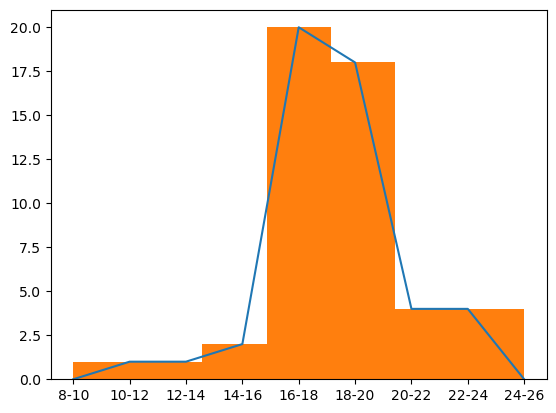

In [26]:
print(i_plus_frec)
print(i_plus_frec[3][1])


intervals = ['8-10','10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24', '24-26']

frec = [0]
for t in range(k):
    frec.append(i_plus_frec[t][1])

frec.append(0)
print('I isolate the frequencies in a single array and add "0" front and back: ', frec, ' and intervals marks: ', intervals)

import matplotlib.pyplot as plt
#plt.hist(bins[:-1], bins, weights=counts)
#plt.style.use('ggplot')

################ to plot the Polygon
xs = intervals
ys = frec
plt.figure()
######################################

plt.plot(xs,ys) 
#plt.show()
plt.hist(intervals, bins=7, weights=frec)
